<a href="https://colab.research.google.com/github/Mrinal-g/Portfolio-Optimization-Using-RL/blob/main/Pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

[*********************100%***********************]  7 of 7 completed


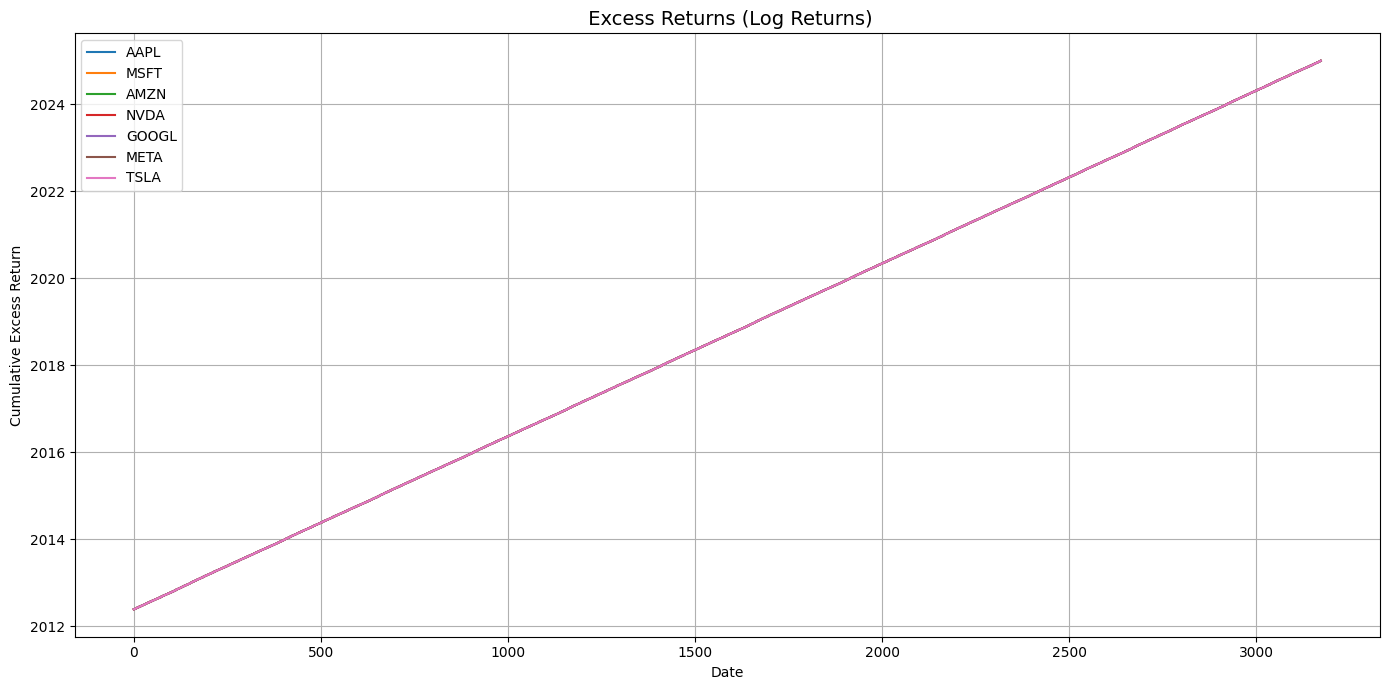

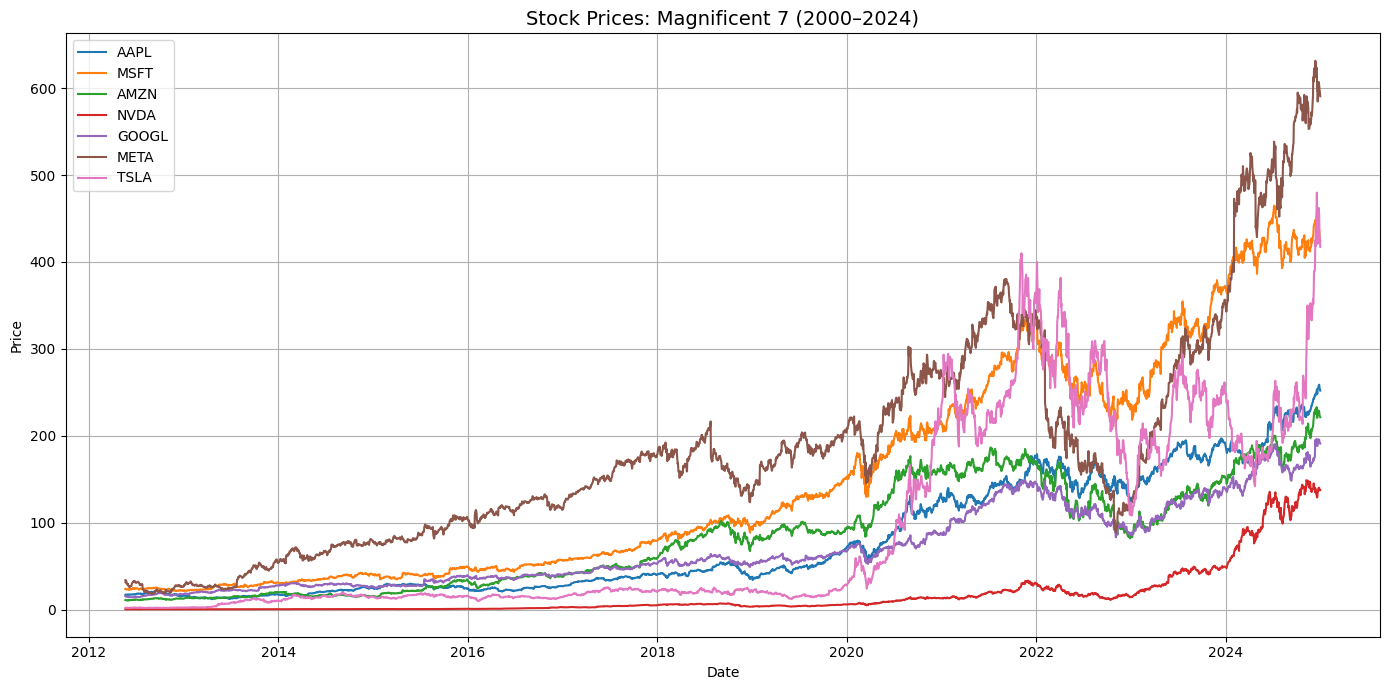

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the Magnificent 7 tickers and date range
tickers = ['AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOGL', 'META', 'TSLA']
start_date = '2000-01-01'
end_date = '2024-12-31'

# Step 1: Download daily close prices
stock_data = yf.download(tickers, start=start_date, end=end_date)['Close']
stock_data.reset_index(inplace=True)  # Convert index to column

# Ensure 'Date' is a datetime column
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Step 2: Calculate log returns
for ticker in tickers:
    stock_data[f'{ticker}_log_return'] = np.log(stock_data[ticker]) - np.log(stock_data[ticker].shift(1))
stock_data.dropna(inplace=True)

# Step 3: Load and clean Fama-French and Momentum factor data
factor_df = pd.read_csv("F-F_Research_Data_Factors_daily-2.CSV", skiprows=3)
mom_df = pd.read_csv("F-F_Momentum_Factor_daily.CSV", skiprows=3)

# Rename columns
factor_df.columns = ['Date', 'Mkt-RF', 'SMB', 'HML', 'RF']
mom_df.columns = ['Date', 'Mom']

# Drop non-numeric rows
factor_df = factor_df[pd.to_numeric(factor_df['Date'], errors='coerce').notnull()]
mom_df = mom_df[pd.to_numeric(mom_df['Date'], errors='coerce').notnull()]

# Convert date and scale values
factor_df['Date'] = pd.to_datetime(factor_df['Date'].astype(str), format='%Y%m%d')
mom_df['Date'] = pd.to_datetime(mom_df['Date'].astype(str), format='%Y%m%d')
factor_df[['Mkt-RF', 'SMB', 'HML', 'RF']] = factor_df[['Mkt-RF', 'SMB', 'HML', 'RF']] / 100
mom_df['Mom'] = mom_df['Mom'] / 100

# Merge factors
merged_factors = pd.merge(mom_df, factor_df[['Date', 'Mkt-RF', 'RF']], on='Date', how='inner')

# Step 4: Merge stock data with factors
final_df = pd.merge(stock_data, merged_factors, on='Date', how='inner')

# Step 5: Calculate excess returns and cumulative excess returns
for ticker in tickers:
    final_df[f'{ticker}_excess_return'] = final_df[f'{ticker}_log_return'] - final_df['RF']
    # final_df[f'{ticker}_cum_excess'] = np.exp(final_df[f'{ticker}_excess_return'].cumsum()) - 1

# Step 6: Plot excess returns
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(final_df['Date'], label=ticker)
plt.title(' Excess Returns (Log Returns)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Cumulative Excess Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: Plot raw prices
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(final_df['Date'], final_df[ticker], label=ticker)
plt.title('Stock Prices: Magnificent 7 (2000–2024)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 8: Export cleaned data (optional)
final_df.to_csv("magnificent7_cleaned_data.csv", index=False)
